Author: Irfan Khan

Place: Helsinki, Finland

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import linear_model
import seaborn as sns
import copy
from sklearn.decomposition import PCA, KernelPCA

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
try:
    data = pd.read_csv("gdsc_pacl_mrna_1000.csv", delimiter=",")
    print(" dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

 dataset has 489 samples with 275 features each.


In [3]:
data.head()

,Unnamed: 0,ENSG00000006625_at,ENSG00000008086_at,ENSG00000011304_at,ENSG00000012048_at,ENSG00000020577_at,ENSG00000041357_at,ENSG00000048991_at,ENSG00000051180_at,ENSG00000051341_at,ENSG00000058804_at,ENSG00000060303_at,ENSG00000062598_at,ENSG00000065328_at,ENSG00000065427_at,ENSG00000067955_at,ENSG00000070061_at,ENSG00000070423_at,ENSG00000070814_at,ENSG00000071626_at,ENSG00000073111_at,ENSG00000075131_at,ENSG00000076003_at,ENSG00000077312_at,ENSG00000077348_at,ENSG00000083635_at,ENSG00000084774_at,ENSG00000085511_at,ENSG00000085563_at,ENSG00000085840_at,ENSG00000086189_at,ENSG00000088247_at,ENSG00000092470_at,ENSG00000095319_at,ENSG00000095485_at,ENSG00000096746_at,ENSG00000097046_at,ENSG00000099284_at,ENSG00000099624_at,ENSG00000099783_at,ENSG00000100033_at,ENSG00000100297_at,ENSG00000100353_at,ENSG00000100479_at,ENSG00000101850_at,ENSG00000102316_at,ENSG00000102967_at,ENSG00000102974_at,ENSG00000103257_at,ENSG00000103653_at,ENSG00000103932_at,ENSG00000103995_at,ENSG00000104147_at,ENSG00000104324_at,ENSG00000104408_at,ENSG00000104687_at,ENSG00000104738_at,ENSG00000104852_at,ENSG00000104897_at,ENSG00000104915_at,ENSG00000104980_at,ENSG00000105202_at,ENSG00000105486_at,ENSG00000106268_at,ENSG00000107581_at,ENSG00000107672_at,ENSG00000107815_at,ENSG00000107833_at,ENSG00000107949_at,ENSG00000108064_at,ENSG00000108179_at,ENSG00000108561_at,ENSG00000109911_at,ENSG00000110958_at,ENSG00000111445_at,ENSG00000111581_at,ENSG00000111605_at,ENSG00000112039_at,ENSG00000112312_at,ENSG00000113048_at,ENSG00000113368_at,ENSG00000113578_at,ENSG00000115053_at,ENSG00000115084_at,ENSG00000115241_at,ENSG00000115289_at,ENSG00000115484_at,ENSG00000115942_at,ENSG00000116750_at,ENSG00000117118_at,ENSG00000117650_at,ENSG00000118193_at,ENSG00000119328_at,ENSG00000119397_at,ENSG00000119969_at,ENSG00000120699_at,ENSG00000120802_at,ENSG00000121152_at,ENSG00000122140_at,ENSG00000123136_at,ENSG00000123737_at,ENSG00000124787_at,ENSG00000125484_at,ENSG00000125835_at,ENSG00000125966_at,ENSG00000127423_at,ENSG00000128708_at,ENSG00000128951_at,ENSG00000129351_at,ENSG00000130159_at,ENSG00000130713_at,ENSG00000130726_at,ENSG00000131269_at,ENSG00000131876_at,ENSG00000132382_at,ENSG00000132423_at,ENSG00000132507_at,ENSG00000132541_at,ENSG00000132780_at,ENSG00000132824_at,ENSG00000133111_at,ENSG00000133119_at,ENSG00000133275_at,ENSG00000133773_at,ENSG00000135063_at,ENSG00000136104_at,ENSG00000136810_at,ENSG00000136811_at,ENSG00000136819_at,ENSG00000136824_at,ENSG00000136861_at,ENSG00000136875_at,ENSG00000136937_at,ENSG00000136938_at,ENSG00000136982_at,ENSG00000137501_at,ENSG00000137574_at,ENSG00000137776_at,ENSG00000137804_at,ENSG00000137812_at,ENSG00000137814_at,ENSG00000137815_at,ENSG00000137822_at,ENSG00000137876_at,ENSG00000138160_at,ENSG00000138326_at,ENSG00000138346_at,ENSG00000138399_at,ENSG00000138442_at,ENSG00000139343_at,ENSG00000139514_at,ENSG00000139637_at,ENSG00000140350_at,ENSG00000140525_at,ENSG00000141499_at,ENSG00000142657_at,ENSG00000143179_at,ENSG00000143476_at,ENSG00000145022_at,ENSG00000145386_at,ENSG00000148180_at,ENSG00000148229_at,ENSG00000148308_at,ENSG00000148459_at,ENSG00000148773_at,ENSG00000148835_at,ENSG00000148840_at,ENSG00000148843_at,ENSG00000149136_at,ENSG00000149480_at,ENSG00000151465_at,ENSG00000151623_at,ENSG00000151632_at,ENSG00000151849_at,ENSG00000155324_at,ENSG00000156261_at,ENSG00000156471_at,ENSG00000156482_at,ENSG00000156502_at,ENSG00000156787_at,ENSG00000157193_at,ENSG00000157456_at,ENSG00000158050_at,ENSG00000158169_at,ENSG00000159055_at,ENSG00000159131_at,ENSG00000159259_at,ENSG00000159593_at,ENSG00000160208_at,ENSG00000162105_at,ENSG00000162385_at,ENSG00000162734_at,ENSG00000163808_at,ENSG00000163811_at,ENSG00000163918_at,ENSG00000164024_at,ENSG00000164032_at,ENSG00000164109_at,ENSG00000164163_at,ENSG00000164818_at,ENSG00000164941_at,ENSG00000165283_at,ENSG00000165688_at,ENSG00000165689_at,ENSG00000165732_at,ENSG00000165733_at,ENSG00000165792_at,ENSG00000166133_at,ENSG00000166197_at,ENSG00000166200_at,ENSG00000166311_a

In [4]:
#data['Unnamed: 0'] = 'number' + data['Unnamed: 0'].astype(str)
#data.set_index(pd.DatetimeIndex(data['Unnamed: 0']), inplace=True)
del data['Unnamed: 0']

In [5]:
data["target"].describe()

count    489.000000
mean       0.684349
std        0.167868
min        0.142377
25%        0.583484
50%        0.701676
75%        0.811664
max        0.979149
Name: target, dtype: float64

In [6]:
data.target.head()

0    0.748243
1    0.922079
2    0.787487
3    0.979149
4    0.486736
Name: target, dtype: float64

In [7]:
cols = list(data.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('target')) #Remove b from list
cols.pop(cols.index('target2')) #Remove b from list

X = data[cols]
y = data.target
X.shape, y.shape

((489, 272), (489,))

I use target as the target variable

# Train Test Split

In [8]:
X_train, X_test , yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=1)


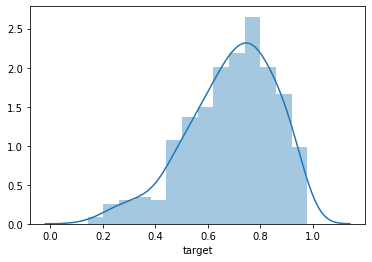

In [9]:
#sns.distplot(y_train.iloc[:,1])
sns.distplot(yTrain)

In [10]:
xTrain = np.array(X_train)
xTest = np.array(X_test)

In [11]:
xTrain.shape

(391, 272)

In [12]:
stdFeatures = np.std(xTrain, axis = 0)
stdFeatures.shape

(272,)

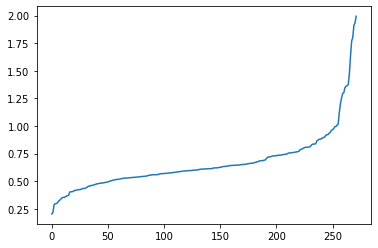

In [13]:
sns.lineplot(range(272),np.sort(stdFeatures))


# I will not drop any features because the features show variance

In [14]:
nFeatures = 272
index = stdFeatures.argsort()[-nFeatures:][::-1]

# Normalization of test data based on training data mean and SD

In [15]:
xTrain_norm = copy.deepcopy(xTrain[:,index]) #[:,index]
xTest_norm = copy.deepcopy(xTest[:,index]) #[:,index]
meanXtrain = np.mean(xTrain_norm,axis=0)
stdXtrain = np.std(xTrain_norm,axis=0)

xTrain_norm = (xTrain_norm-meanXtrain)/stdXtrain
xTest_norm = (xTest_norm-meanXtrain)/stdXtrain

In [16]:
#finalDf.head()
#xPCA.view()
xTrain_norm = pd.DataFrame(xTrain_norm)
xTest_norm = pd.DataFrame(xTest_norm)
xTrain_norm.columns = X_train.columns
xTest_norm.columns = X_test.columns

In [17]:
xTrain_norm.shape, xTest_norm.shape



((391, 272), (98, 272))

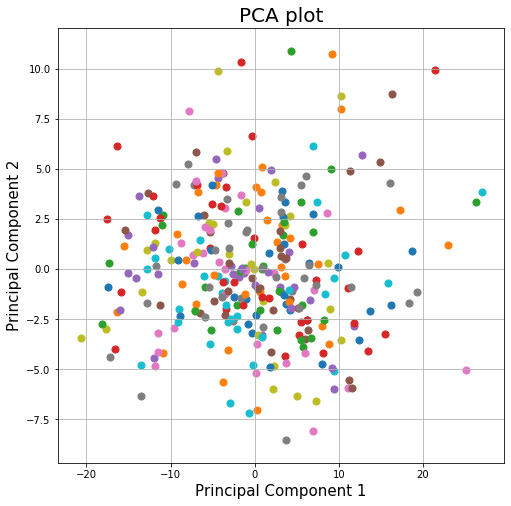

In [18]:
pca = PCA(n_components = 2)
pca.fit(xTrain_norm)
xPCA = pca.transform(xTrain_norm)

principalDf = pd.DataFrame(data = xPCA
            , columns = ['principal component 1', 'principal component 2'])
target = pd.DataFrame(yTrain)#.iloc[:,1]
#print(target)
finalDf = pd.concat([principalDf, target], axis = 1)
finalDf.rename(columns={1: 'target'}, inplace=True)
#print('PCA plot before correcting for technical variation (noise) i.e., device specific')
#finalDf.head()

finalDf.target.describe()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA plot', fontsize = 20)
#targets = [1, 2, 3, 4, 5, 6]
targets = yTrain
colors = ['r', 'b', 'c', 'g', 'm', 'y']
#for target, color in zip(targets,colors):
for target in targets:
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               #, c = color
               , s = 50)
#ax.legend(targets)
ax.grid()

In [19]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.27511177, 0.04739702])

# since the first 2 components of PCA cover only 31% of variance, I will not use the PCA'd feature data. However, I will not not Kernel PCA as follows because the data is very disperse as shown above

In [21]:
#pca = KernelPCA(n_components = 10)
#pca.fit(xTrain_norm)
#xPCA = pca.transform(xTrain_norm)
#xPCA_test = pca.transform(xTest_norm)

In [20]:
#import statsmodels.api as sm
#model = sm.OLS(yTrain, xTrain_norm).fit()
#predictions = model.predict(xTest_norm) # make the predictions by the model
# Print out the statistics
#model.summary()

In [22]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(pd.DataFrame(xTrain_norm), yTrain) 
  
# Generate Prediction on test set 
lreg_y_pred = lreg.predict(pd.DataFrame(xTest_norm))
  
# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - yTest)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 
  
# Putting together the coefficient and their corrsponding variable names  
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = pd.DataFrame(xTrain_norm).columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 


Mean squared Error on test set :  0.04388918713055186
                Columns  Coefficient Estimate
0    ENSG00000006625_at             -0.002083
1    ENSG00000008086_at             -0.018402
2    ENSG00000011304_at             -0.002923
3    ENSG00000012048_at              0.010734
4    ENSG00000020577_at              0.003313
..                  ...                   ...
267  ENSG00000226142_at             -0.024653
268  ENSG00000237649_at              0.000883
269  ENSG00000265107_at             -0.013566
270  ENSG00000265354_at             -0.004527
271  ENSG00000265972_at             -0.063535

[272 rows x 2 columns]


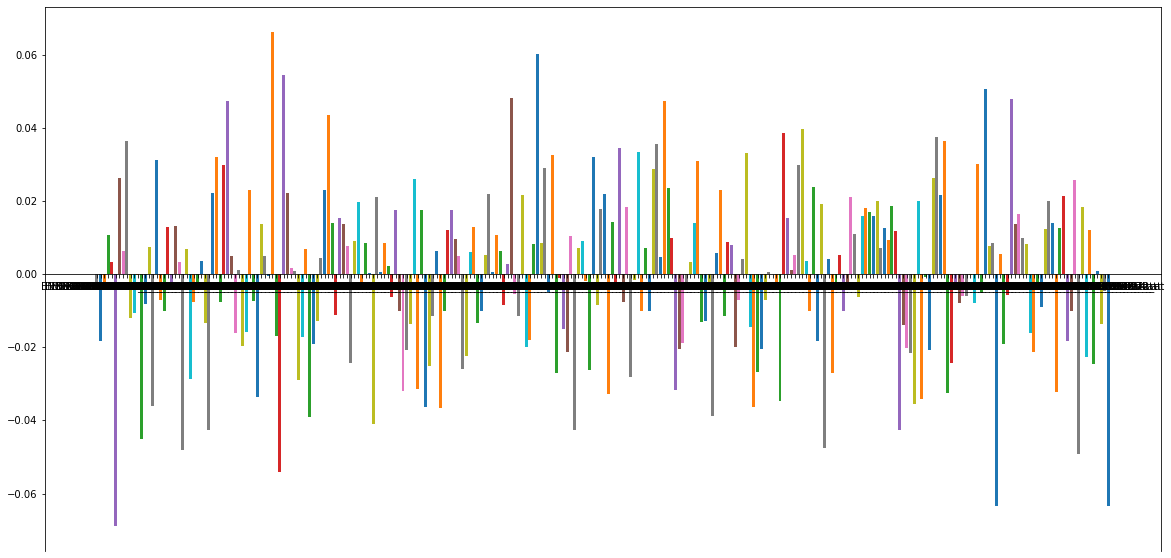

In [25]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lreg_coefficient["Columns"],  
lreg_coefficient['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

In [23]:
xTrain_norm.shape

(391, 272)

In [24]:
from sklearn.linear_model import ElasticNet 
  
# Train the model 
e_net = ElasticNet(alpha = 1) 
e_net.fit(xTrain_norm, yTrain) 
  
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(xTest_norm) 
mean_squared_error = np.mean((y_pred_elastic - yTest)**2) 
print("Mean Squared Error on test set", mean_squared_error) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = xTrain_norm.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
#e_net_coeff 

Mean Squared Error on test set 0.02781984630326562


# there is significant drop in MSE after using elastic net regression

In [26]:
"""
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(e_net_coeff["Columns"],  
e_net_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() """

'\n# plotting the coefficient score \nfig, ax = plt.subplots(figsize =(20, 10)) \n  \ncolor =[\'tab:gray\', \'tab:blue\', \'tab:orange\',  \n\'tab:green\', \'tab:red\', \'tab:purple\', \'tab:brown\',  \n\'tab:pink\', \'tab:gray\', \'tab:olive\', \'tab:cyan\',  \n\'tab:orange\', \'tab:green\', \'tab:blue\', \'tab:olive\'] \n  \nax.bar(e_net_coeff["Columns"],  \ne_net_coeff[\'Coefficient Estimate\'],  \ncolor = color) \n  \nax.spines[\'bottom\'].set_position(\'zero\') \n  \nplt.style.use(\'ggplot\') \nplt.show() '